### Mean/Median_Imputation

When the data is in the form of Missing Data Completely at Random (MCAR), the we should use Mean/Median Imputation
In Mean/Median Imputation what we do is, we replace the missing values with the Mean of aal values of a category. To overcome the outliers we will use Median instead of Mean.

In [28]:
#We will import the libraries we need
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
#Lets have a look at the Titanic dataset
df = pd.read_csv("drive/MyDrive/Data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Having a look at the dataset, we observed that the age category have missing values. So we will drop the other columns that we dont need.

In [22]:
df_1 = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis= 1) 

In [23]:
df_1

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


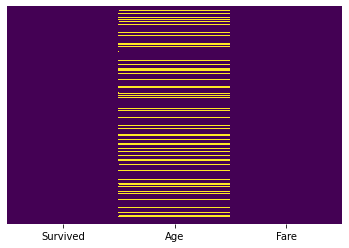

In [32]:
sns.heatmap(df_1.isnull(), yticklabels = False ,cbar = False,cmap = 'viridis')

In [27]:
df_1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

Out of 891, 177 values are missing for the Age category

In [26]:
df_1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

19% of Age is missing or have NULL value

In [39]:
#Now we'll make a function which will add a new column which have the median value instead of missing
def impute_nan(df, variable, median):
  df_1[variable+'_median'] = df_1[variable].fillna(median)

In [40]:
median = df_1.Age.median()
median

28.0

The Median of the Age is 28. So now we have to fill all the missing values with 28. For this we have to call the function impute_nan()

In [43]:
impute_nan(df_1, 'Age', median)
df_1.head(20)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


All the missing values in Age is now Filled with 28 in the category Age_median

In [45]:
print(df_1['Age'].std())
print(df_1['Age_median'].std())

14.526497332334044
13.019696550973194


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

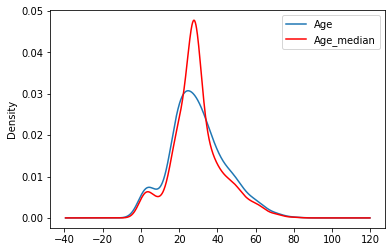

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_1['Age'].plot(kind = 'kde', ax = ax)
df_1.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages Of Mean/Median Imputation

1.   Easy to implement
2.   Faster way to get whole dataset

### Disadvantages of Mean/Median Imputation

1.   Change or distortion in the orignal variance 
2.   It Impacts the Correlation